In [1]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "1"   # or number of cores you want

In [2]:
#import libraries
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [4]:
cpd = pd.read_csv('carprice_dataset.csv')
cpd.head()

,Unnamed: 0,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered


In [5]:
#check dataset shape
cpd.shape

(46022, 14)

In [6]:
#check data types
cpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46022 entries, 0 to 46021
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           46022 non-null  int64 
 1   Company Name         46022 non-null  object
 2   Model Name           46022 non-null  object
 3   Price                46022 non-null  int64 
 4   Model Year           46022 non-null  int64 
 5   Location             46022 non-null  object
 6   Mileage              46022 non-null  int64 
 7   Engine Type          46022 non-null  object
 8   Engine Capacity      46022 non-null  int64 
 9   Color                46022 non-null  object
 10  Assembly             46022 non-null  object
 11  Body Type            46022 non-null  object
 12  Transmission Type    46022 non-null  object
 13  Registration Status  46022 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.9+ MB


In [7]:
#check for missing values
cpd.isnull().sum()

Unnamed: 0             0
Company Name           0
Model Name             0
Price                  0
Model Year             0
Location               0
Mileage                0
Engine Type            0
Engine Capacity        0
Color                  0
Assembly               0
Body Type              0
Transmission Type      0
Registration Status    0
dtype: int64

In [8]:
#statistical summary
cpd.describe()

,Unnamed: 0,Price,Model Year,Mileage,Engine Capacity
count,46022.000000,4.602200e+04,46022.000000,46022.000000,46022.000000
mean,23010.526205,2.014153e+06,2011.035374,90965.128243,1313.115575
std,13285.595581,2.939071e+06,6.399403,63656.656034,614.690832
min,0.000000,1.110000e+05,1990.000000,1.000000,16.000000
25%,11505.250000,8.500000e+05,2007.000000,48899.500000,1000.000000
50%,23010.500000,1.450000e+06,2013.000000,80000.000000,1300.000000
75%,34515.750000,2.300000e+06,2016.000000,120000.000000,1500.000000
max,46022.000000,7.750000e+07,2019.000000,999999.000000,6600.000000


In [9]:
#check for uniwue values in columns
for col in ['Company Name', 'Model Name', 'Engine Type', 'Color', 'Transmission Type', 'Location']:
    print(col, cpd[col].nunique())


Company Name 31
Model Name 196
Engine Type 3
Color 24
Transmission Type 2
Location 6


In [10]:
cpd.duplicated().sum()

np.int64(0)

In [11]:
# Create Car Age from Model Year
#Car age often has more predictive power than the raw model year
cpd['Car_Age'] = 2025 - cpd['Model Year']  # assuming current year is 2025
cpd.drop('Model Year', axis=1, inplace=True)

In [12]:
# X contains all features except the target (Price), and y contains the target
X = cpd.drop(['Price', 'Unnamed: 0'], axis=1)
y = cpd['Price']
cpd.head()

,Unnamed: 0,Company Name,Model Name,Price,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status,Car_Age
0,0,Toyota,Vitz,2385000,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered,8
1,1,Toyota,Corolla,111000,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered,6
2,2,Suzuki,Alto,1530000,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered,6
3,3,Suzuki,Alto,1650000,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered,6
4,4,Toyota,Corolla,1435000,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered,15


In [13]:
OPTIONS_COMPANY = sorted(cpd["Company Name"].unique())
OPTIONS_MODEL = sorted(cpd["Model Name"].unique())
OPTIONS_LOCATION = sorted(cpd["Location"].unique())
OPTIONS_ENGINE_TYPE = sorted(cpd["Engine Type"].unique())
OPTIONS_COLOR = sorted(cpd["Color"].unique())
OPTIONS_ASSEMBLY = sorted(cpd["Assembly"].unique())
OPTIONS_BODY = sorted(cpd["Body Type"].unique())
OPTIONS_TRANSMISSION = sorted(cpd["Transmission Type"].unique())
OPTIONS_REGISTRATION = sorted(cpd["Registration Status"].unique())
OPTIONS_REGISTRATION = sorted(cpd["Car_Age"].unique())

# Correlation Heatmap
Correlation ranges from -1 to 1.

High positive correlation (close to 1) means variables move together.

Helps identify which numeric features most influence price.

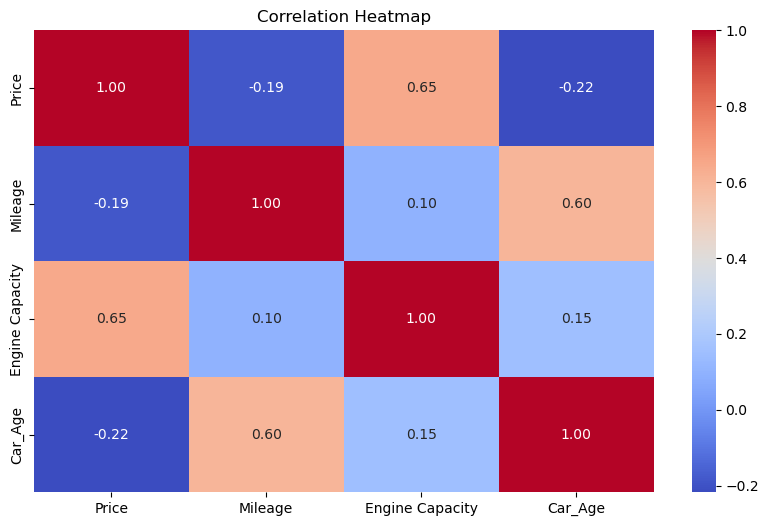

In [14]:
# Correlation heatmap
plt.figure(figsize=(10,6))
numeric_cols = ['Price', 'Mileage', 'Engine Capacity', 'Car_Age']
corr = cpd[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


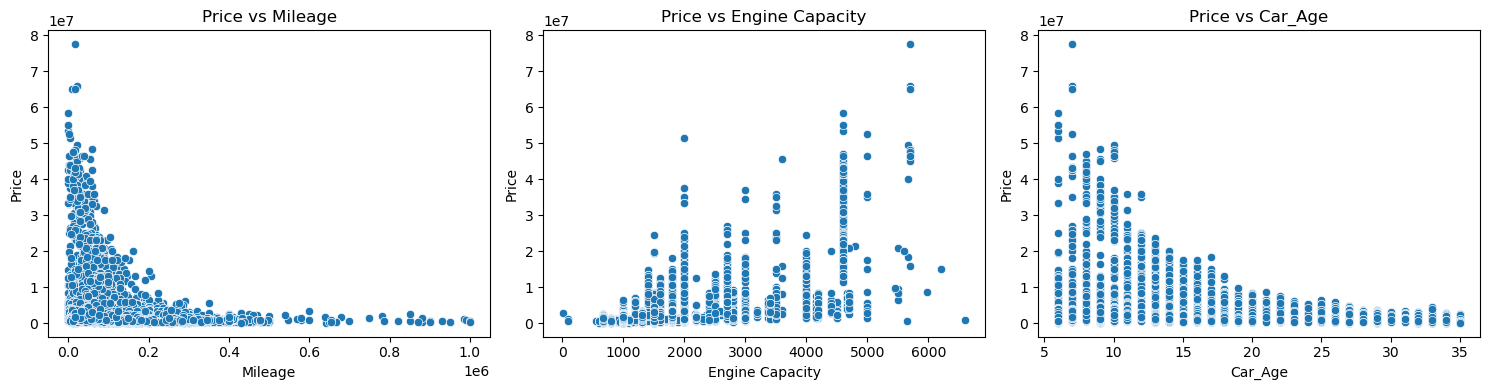

In [15]:
# Scatterplots for Price vs numeric features
plt.figure(figsize=(15,4))

for i, col in enumerate(['Mileage', 'Engine Capacity', 'Car_Age']):
    plt.subplot(1,3,i+1)
    sns.scatterplot(x=cpd[col], y=cpd['Price'])
    plt.title(f"Price vs {col}")

plt.tight_layout()
plt.show()
#Each plot shows how Price changes with Mileage, Engine Capacity, and Car Age.

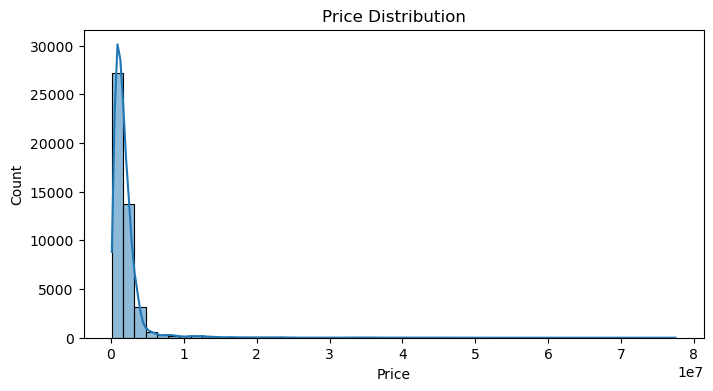

In [16]:
#price distribution plot
plt.figure(figsize=(8,4))
sns.histplot(cpd['Price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.show()


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Numeric columns to scale
numeric_features = ["Car_Age", "Mileage", "Engine Capacity"]

# ALL categorical columns 
categorical_features = [
    "Company Name",
    "Model Name",
    "Location",
    "Engine Type",
    "Color",
    "Assembly",
    "Body Type",
    "Transmission Type",
    "Registration Status"
]

# Preprocessor with:
# - StandardScaler for numeric columns
# - OneHotEncoder for ALL categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features),
    ],
    remainder="drop"   # keep only the processed columns
)


Each model is wrapped in the same preprocessing pipeline.

5-fold cross-validation gives a robust estimate of performance.

The model with highest mean R² is the best candidate.

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [35]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": XGBRegressor(verbosity=0),
    "Lasso": Lasso()
}

# MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero = y_true != 0
    return np.mean(np.abs((y_true[non_zero] - y_pred[non_zero]) / y_true[non_zero])) * 100

results = []
model_objects = {}

for name, model in models.items():
    print(f"Training: {name}...")

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Fit model
    pipeline.fit(X_train, y_train)

    # Predictions
    preds = pipeline.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    mape = mean_absolute_percentage_error(y_test, preds)
    accuracy = 100 - mape

    # Save results
    results.append([name, mae, mse, rmse, r2, accuracy])
    model_objects[name] = pipeline

# DataFrame
results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R2", "Accuracy"])
results_df = results_df.sort_values(by="R2", ascending=False)

print("\nMODEL EVALUATION RESULTS:\n")
print(results_df)

Training: Linear Regression...
Training: Ridge Regression...
Training: Random Forest...
Training: Gradient Boosting...
Training: KNN...
Training: ElasticNet...
Training: Lasso...

MODEL EVALUATION RESULTS:

               Model            MAE           MSE          RMSE        R2  \
2      Random Forest  224559.010583  4.440858e+11  6.663976e+05  0.950078   
3  Gradient Boosting  254983.673685  4.556314e+11  6.750048e+05  0.948780   
4                KNN  223609.016839  6.422327e+11  8.013942e+05  0.927803   
1   Ridge Regression  593482.567472  2.717167e+12  1.648383e+06  0.694550   
0  Linear Regression  588597.700386  2.722484e+12  1.649995e+06  0.693952   
6              Lasso  588689.869311  2.724997e+12  1.650756e+06  0.693669   
5         ElasticNet  651567.287795  4.702536e+12  2.168533e+06  0.471364   

    Accuracy  
2  87.698746  
3  84.692364  
4  88.782757  
1  56.365382  
0  56.717274  
6  56.716195  
5  61.567201  


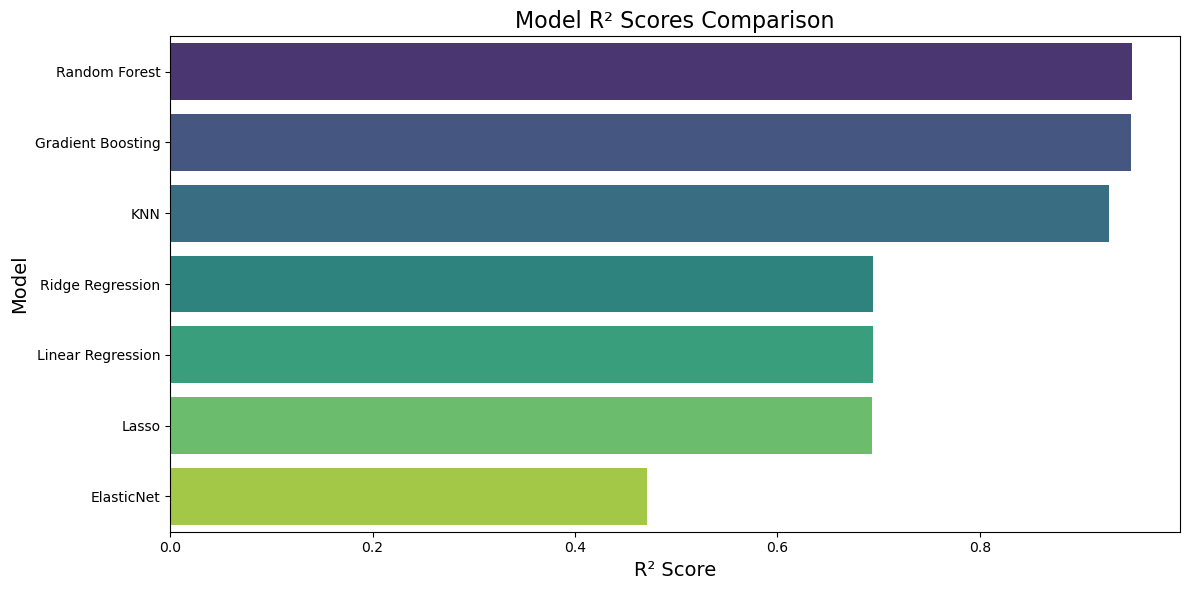

In [36]:
plt.figure(figsize=(12, 6))

# Sort results for cleaner plotting
results_cpd_sorted = results_df.sort_values(by="R2", ascending=False)

sns.barplot( x="R2",  y="Model", hue="Model", legend=False, data=results_cpd_sorted, palette="viridis")

plt.title("Model R² Scores Comparison", fontsize=16)
plt.xlabel("R² Score", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.tight_layout()
plt.show()

In [37]:
best_model_name = results_cpd_sorted.iloc[0]["Model"]
best_pipeline = model_objects[best_model_name]

# retrain on ALL data
best_pipeline.fit(X, y)

# save it
joblib.dump(best_pipeline, "car_price_model.pkl", compress=3)

print(f"Best model saved: {best_model_name}")


Best model saved: Random Forest


In [38]:
def predict_car_price(input_dict):
    df = pd.DataFrame([input_dict])
    prediction = best_pipeline.predict(df)[0]
    return prediction

In [42]:
unique_values = {col: cpd[col].sort_values().unique().tolist() for col in categorical_features}

# Save to a file for Flask to load (optional)
import json
with open("unique_values.json", "w") as f:
    json.dump(unique_values, f)

In [ ]:
pip uninstall xgboost
